# Imports

In [2]:
from sklearn.datasets import fetch_mldata
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import scale
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# KNN

In [3]:
data_frame = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [4]:
mediaChance = data_frame['Chance of Admit '].mean()

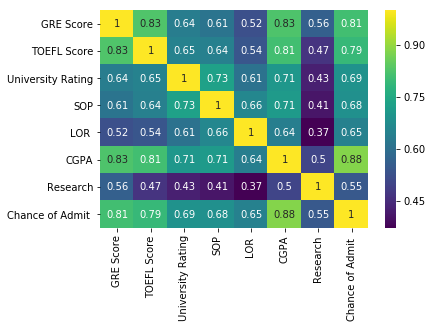

In [5]:
sns.heatmap(data_frame.drop(axis=1, columns=['Serial No.']).corr(), annot=True, cmap='viridis')

In [6]:
data_frame['GRE Score'] = data_frame['GRE Score'] / data_frame['GRE Score'].max()
data_frame['TOEFL Score'] = data_frame['TOEFL Score'] / data_frame['TOEFL Score'].max()
data_frame['University Rating'] = data_frame['University Rating'] / data_frame['University Rating'].max()
data_frame['SOP'] = data_frame['SOP'] / data_frame['SOP'].max()
data_frame['LOR '] = data_frame['LOR '] / data_frame['LOR '].max()
data_frame['CGPA'] = data_frame['CGPA'] / data_frame['CGPA'].max()

In [7]:
knn = KNeighborsClassifier()

In [8]:
data_frame[(data_frame[['Chance of Admit ']] >= mediaChance)] = 1
data_frame[(data_frame[['Chance of Admit ']] < mediaChance)] = 0

data_frame.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,0.991176,0.983333,0.8,0.9,0.9,0.972782,1,1.0
1,2,0.952941,0.891667,0.8,0.8,0.9,0.894153,1,1.0
2,3,0.929412,0.866667,0.6,0.6,0.7,0.806452,1,0.0
3,4,0.947059,0.916667,0.6,0.7,0.5,0.873992,1,1.0
4,5,0.923529,0.858333,0.4,0.4,0.6,0.827621,0,0.0


In [9]:
x = data_frame.drop(['Serial No.', 'Research', 'Chance of Admit '], axis=1)[['GRE Score', 'TOEFL Score', 'CGPA','SOP', 'LOR ', 'University Rating']]
y = data_frame['Chance of Admit ']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [10]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [11]:
print("Acurácia de teste KNN: ", knn.score(x_test, y_test))

Acurácia de teste KNN:  0.848


# Árvore de Decisão

In [12]:
arvore_entropy = DecisionTreeClassifier('entropy')
arvore_gini = DecisionTreeClassifier()

In [13]:
arvore_entropy.fit(x_train, y_train)
arvore_gini.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [14]:
print("Acurácia entropia: ", arvore_entropy.score(x_test, y_test))
print("Acurácia gini: ", arvore_gini.score(x_test, y_test))

Acurácia entropia:  0.8
Acurácia gini:  0.808


# Rede Neural

In [15]:
model = Sequential()
model.add(Dense(128, input_shape=(6,), activation="sigmoid"))
model.add(Dense(64, activation="sigmoid"))
model.add(Dense(2, activation="softmax"))

In [16]:
#transforma tudo de cada em parametro em 0 e 1 e coloca em uma lista
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [17]:
print("[INFO] treinando a rede neural...")
model.compile(optimizer=SGD(0.1), loss="categorical_crossentropy", metrics=["accuracy"])
train = model.fit(x=x_train, y=y_train, batch_size=128, epochs=500, verbose=2, validation_data=(x_test, y_test))

[INFO] treinando a rede neural...
Train on 375 samples, validate on 125 samples
Epoch 1/500
 - 0s - loss: 0.8678 - acc: 0.4747 - val_loss: 0.6864 - val_acc: 0.5520
Epoch 2/500
 - 0s - loss: 0.6973 - acc: 0.5520 - val_loss: 0.6845 - val_acc: 0.5520
Epoch 3/500
 - 0s - loss: 0.6926 - acc: 0.5013 - val_loss: 0.6887 - val_acc: 0.5520
Epoch 4/500
 - 0s - loss: 0.6903 - acc: 0.5067 - val_loss: 0.6885 - val_acc: 0.5520
Epoch 5/500
 - 0s - loss: 0.6920 - acc: 0.4880 - val_loss: 0.7256 - val_acc: 0.4480
Epoch 6/500
 - 0s - loss: 0.6925 - acc: 0.5120 - val_loss: 0.6867 - val_acc: 0.5520
Epoch 7/500
 - 0s - loss: 0.6950 - acc: 0.4720 - val_loss: 0.6902 - val_acc: 0.4800
Epoch 8/500
 - 0s - loss: 0.6888 - acc: 0.5227 - val_loss: 0.6897 - val_acc: 0.5280
Epoch 9/500
 - 0s - loss: 0.6928 - acc: 0.5467 - val_loss: 0.6833 - val_acc: 0.5520
Epoch 10/500
 - 0s - loss: 0.6963 - acc: 0.5413 - val_loss: 0.7204 - val_acc: 0.4480
Epoch 11/500
 - 0s - loss: 0.7032 - acc: 0.5013 - val_loss: 0.7235 - val_acc: 0

Epoch 97/500
 - 0s - loss: 0.6772 - acc: 0.6453 - val_loss: 0.6648 - val_acc: 0.6560
Epoch 98/500
 - 0s - loss: 0.6701 - acc: 0.7040 - val_loss: 0.6740 - val_acc: 0.5680
Epoch 99/500
 - 0s - loss: 0.6693 - acc: 0.6000 - val_loss: 0.6643 - val_acc: 0.6720
Epoch 100/500
 - 0s - loss: 0.6713 - acc: 0.6240 - val_loss: 0.6685 - val_acc: 0.7840
Epoch 101/500
 - 0s - loss: 0.6709 - acc: 0.6293 - val_loss: 0.6939 - val_acc: 0.4480
Epoch 102/500
 - 0s - loss: 0.6790 - acc: 0.4960 - val_loss: 0.6672 - val_acc: 0.8000
Epoch 103/500
 - 0s - loss: 0.6733 - acc: 0.6213 - val_loss: 0.7176 - val_acc: 0.4480
Epoch 104/500
 - 0s - loss: 0.6715 - acc: 0.6267 - val_loss: 0.6641 - val_acc: 0.8000
Epoch 105/500
 - 0s - loss: 0.6728 - acc: 0.6560 - val_loss: 0.6631 - val_acc: 0.7920
Epoch 106/500
 - 0s - loss: 0.6721 - acc: 0.6533 - val_loss: 0.6605 - val_acc: 0.5520
Epoch 107/500
 - 0s - loss: 0.6747 - acc: 0.4800 - val_loss: 0.6608 - val_acc: 0.5520
Epoch 108/500
 - 0s - loss: 0.6899 - acc: 0.4507 - val_lo

Epoch 193/500
 - 0s - loss: 0.6643 - acc: 0.5013 - val_loss: 0.6122 - val_acc: 0.8080
Epoch 194/500
 - 0s - loss: 0.6270 - acc: 0.7200 - val_loss: 0.6088 - val_acc: 0.7280
Epoch 195/500
 - 0s - loss: 0.6212 - acc: 0.7093 - val_loss: 0.6136 - val_acc: 0.8000
Epoch 196/500
 - 0s - loss: 0.6187 - acc: 0.7840 - val_loss: 0.6067 - val_acc: 0.7920
Epoch 197/500
 - 0s - loss: 0.6274 - acc: 0.6800 - val_loss: 0.6222 - val_acc: 0.7360
Epoch 198/500
 - 0s - loss: 0.6456 - acc: 0.6027 - val_loss: 0.6852 - val_acc: 0.4560
Epoch 199/500
 - 0s - loss: 0.6221 - acc: 0.6960 - val_loss: 0.6062 - val_acc: 0.8080
Epoch 200/500
 - 0s - loss: 0.6168 - acc: 0.7147 - val_loss: 0.6065 - val_acc: 0.6640
Epoch 201/500
 - 0s - loss: 0.6207 - acc: 0.6773 - val_loss: 0.6044 - val_acc: 0.8080
Epoch 202/500
 - 0s - loss: 0.6101 - acc: 0.7920 - val_loss: 0.6128 - val_acc: 0.7920
Epoch 203/500
 - 0s - loss: 0.6099 - acc: 0.7840 - val_loss: 0.6075 - val_acc: 0.8080
Epoch 204/500
 - 0s - loss: 0.6095 - acc: 0.7733 - val

Epoch 289/500
 - 0s - loss: 0.5087 - acc: 0.8000 - val_loss: 0.5051 - val_acc: 0.8160
Epoch 290/500
 - 0s - loss: 0.5074 - acc: 0.8000 - val_loss: 0.4921 - val_acc: 0.8080
Epoch 291/500
 - 0s - loss: 0.5314 - acc: 0.7467 - val_loss: 0.5167 - val_acc: 0.7920
Epoch 292/500
 - 0s - loss: 0.5308 - acc: 0.7707 - val_loss: 0.5628 - val_acc: 0.6880
Epoch 293/500
 - 0s - loss: 0.5110 - acc: 0.7813 - val_loss: 0.4901 - val_acc: 0.8160
Epoch 294/500
 - 0s - loss: 0.5069 - acc: 0.7787 - val_loss: 0.4930 - val_acc: 0.8000
Epoch 295/500
 - 0s - loss: 0.5017 - acc: 0.7920 - val_loss: 0.5306 - val_acc: 0.7520
Epoch 296/500
 - 0s - loss: 0.5064 - acc: 0.7973 - val_loss: 0.5427 - val_acc: 0.7360
Epoch 297/500
 - 0s - loss: 0.5564 - acc: 0.7067 - val_loss: 0.4858 - val_acc: 0.8000
Epoch 298/500
 - 0s - loss: 0.5102 - acc: 0.7547 - val_loss: 0.4857 - val_acc: 0.8080
Epoch 299/500
 - 0s - loss: 0.5102 - acc: 0.7707 - val_loss: 0.5337 - val_acc: 0.7520
Epoch 300/500
 - 0s - loss: 0.5179 - acc: 0.7680 - val

Epoch 385/500
 - 0s - loss: 0.4379 - acc: 0.7893 - val_loss: 0.4219 - val_acc: 0.8000
Epoch 386/500
 - 0s - loss: 0.4388 - acc: 0.7973 - val_loss: 0.4164 - val_acc: 0.8080
Epoch 387/500
 - 0s - loss: 0.4645 - acc: 0.7813 - val_loss: 0.5396 - val_acc: 0.7360
Epoch 388/500
 - 0s - loss: 0.4928 - acc: 0.7627 - val_loss: 0.4131 - val_acc: 0.8000
Epoch 389/500
 - 0s - loss: 0.4415 - acc: 0.7787 - val_loss: 0.4141 - val_acc: 0.8080
Epoch 390/500
 - 0s - loss: 0.4368 - acc: 0.7920 - val_loss: 0.4252 - val_acc: 0.7920
Epoch 391/500
 - 0s - loss: 0.4367 - acc: 0.8000 - val_loss: 0.4118 - val_acc: 0.7920
Epoch 392/500
 - 0s - loss: 0.4639 - acc: 0.7787 - val_loss: 0.5905 - val_acc: 0.6800
Epoch 393/500
 - 0s - loss: 0.4630 - acc: 0.7840 - val_loss: 0.5253 - val_acc: 0.7360
Epoch 394/500
 - 0s - loss: 0.4510 - acc: 0.7893 - val_loss: 0.4360 - val_acc: 0.7920
Epoch 395/500
 - 0s - loss: 0.4356 - acc: 0.8000 - val_loss: 0.4104 - val_acc: 0.8080
Epoch 396/500
 - 0s - loss: 0.4379 - acc: 0.8107 - val

Epoch 481/500
 - 0s - loss: 0.5432 - acc: 0.7493 - val_loss: 0.3937 - val_acc: 0.8000
Epoch 482/500
 - 0s - loss: 0.4335 - acc: 0.7947 - val_loss: 0.4632 - val_acc: 0.7920
Epoch 483/500
 - 0s - loss: 0.4367 - acc: 0.7920 - val_loss: 0.4655 - val_acc: 0.7920
Epoch 484/500
 - 0s - loss: 0.4266 - acc: 0.8080 - val_loss: 0.4293 - val_acc: 0.7840
Epoch 485/500
 - 0s - loss: 0.4253 - acc: 0.8027 - val_loss: 0.4082 - val_acc: 0.8080
Epoch 486/500
 - 0s - loss: 0.4238 - acc: 0.8000 - val_loss: 0.4177 - val_acc: 0.8080
Epoch 487/500
 - 0s - loss: 0.4392 - acc: 0.7760 - val_loss: 0.3902 - val_acc: 0.8000
Epoch 488/500
 - 0s - loss: 0.4314 - acc: 0.7947 - val_loss: 0.4064 - val_acc: 0.8000
Epoch 489/500
 - 0s - loss: 0.4598 - acc: 0.7680 - val_loss: 0.4353 - val_acc: 0.8080
Epoch 490/500
 - 0s - loss: 0.5760 - acc: 0.7307 - val_loss: 0.4516 - val_acc: 0.8080
Epoch 491/500
 - 0s - loss: 0.4213 - acc: 0.8000 - val_loss: 0.4020 - val_acc: 0.7920
Epoch 492/500
 - 0s - loss: 0.4197 - acc: 0.7973 - val

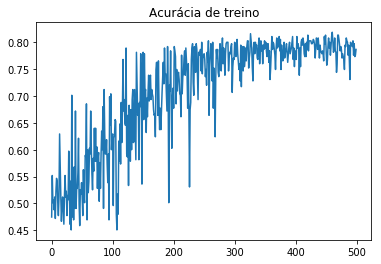

In [18]:
plt.title("Acurácia de treino")
plt.plot(train.history['acc'])
plt.show()

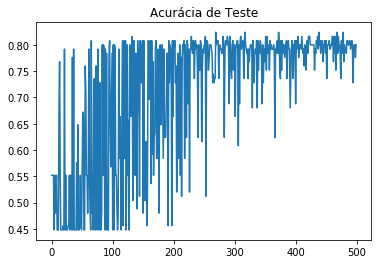

In [19]:
plt.title("Acurácia de Teste")
plt.plot(train.history['val_acc'])
plt.show()